## Import Module

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy as scipy_entropy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

## 讀取檔案

In [2]:
df = pd.read_csv('sizes3.csv')
X = df.drop('class', axis=1)
y = df['class']

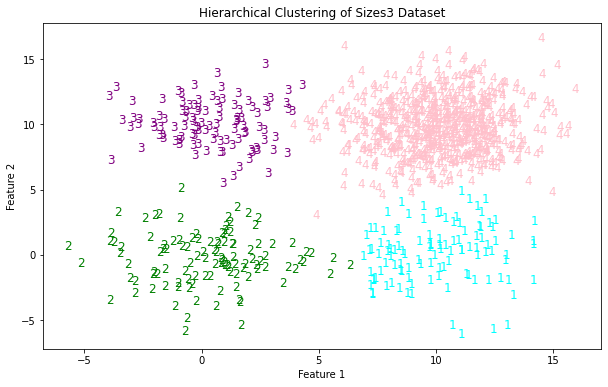

Clustering Elapsed Time: 2.10 s
SSE:  2689.185070294011
Accuracy:  0.986
Entropy:  0.08646197177991977


In [3]:
# 開始計時
start_time = time.time()

# 執行階層式分群
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
linked_sizes3 = linkage(df.drop('class', axis=1), 'ward')
hc_labels = fcluster(linked_sizes3, t=4, criterion='maxclust')

# 繪製散點圖
plt.figure(figsize=(10, 6))
colors = ['cyan', 'green', 'purple', 'pink']  # 每個群聚的顏色
for i in range(1, 5):
    cluster_points = df[hc_labels == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=colors[i-1], label=f'Cluster {i}', alpha=0.001)
    for j, (index, row) in enumerate(cluster_points.iterrows()):
        x, y = row.iloc[0], row.iloc[1]
        plt.text(x, y, str(i), color=colors[i-1], fontsize=12, ha='center', va='center')  # 在每個位置上添加數字
plt.title('Hierarchical Clustering of Sizes3 Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 停止計時
end_time = time.time()

# 計算SSE
centroids = [df[hc_labels == i][['x', 'y']].mean(axis=0) for i in range(hc.n_clusters)]
sse_total = sum(np.sum(np.linalg.norm(df[hc_labels == i][['x', 'y']] - centroids[i][['x', 'y']], axis=1)**2) for i in range(hc.n_clusters))

# 計算熵
cluster_entropy = [scipy_entropy(df[hc_labels == i]['class'].value_counts(normalize=True)) for i in range(hc.n_clusters)]
mean_entropy = np.mean(cluster_entropy)

# 計算Accuracy
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size
accuracy = calculate_accuracy(df['class'], hc_labels)

# 輸出結果
print("Clustering Elapsed Time: {:.2f} s".format(end_time - start_time))
print("SSE: ", sse_total)
print("Accuracy: ", accuracy)
print("Entropy: ", mean_entropy)

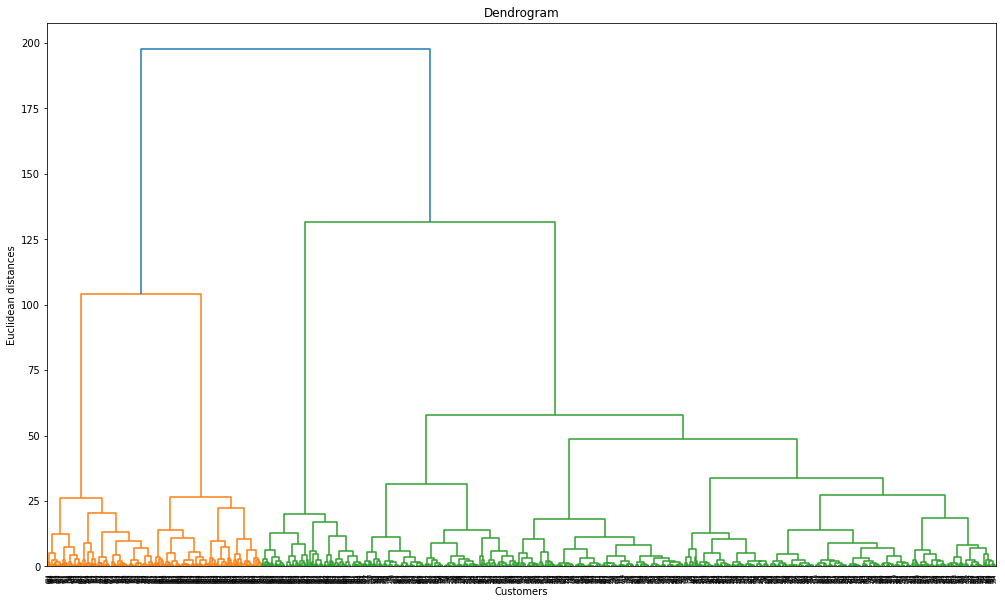

In [4]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
plt.figure(figsize=(17,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()